# 6.6 Sourcing & Analyzing Time-Series Data

### The script contains:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Consumer Price Index - Euro Area Data

### 1. Importing your libraries and data

In [167]:
# Installing Quandl using conda: conda install quandl`

In [168]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [169]:
# Configuring API key 

quandl.ApiConfig.api_key = 'iaFyXR8zjEGedDZPv5aS'

In [171]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('RATEINF/CPI_EUR')

In [172]:
data.head(5)

,Value
Date,
1990-01-31,69.46
1990-02-28,69.71
1990-03-31,69.88
1990-04-30,70.14
1990-05-31,70.30


In [173]:
data.shape

(401, 1)

In [174]:
data.columns

Index(['Value'], dtype='object')

In [175]:
type(data)

pandas.core.frame.DataFrame

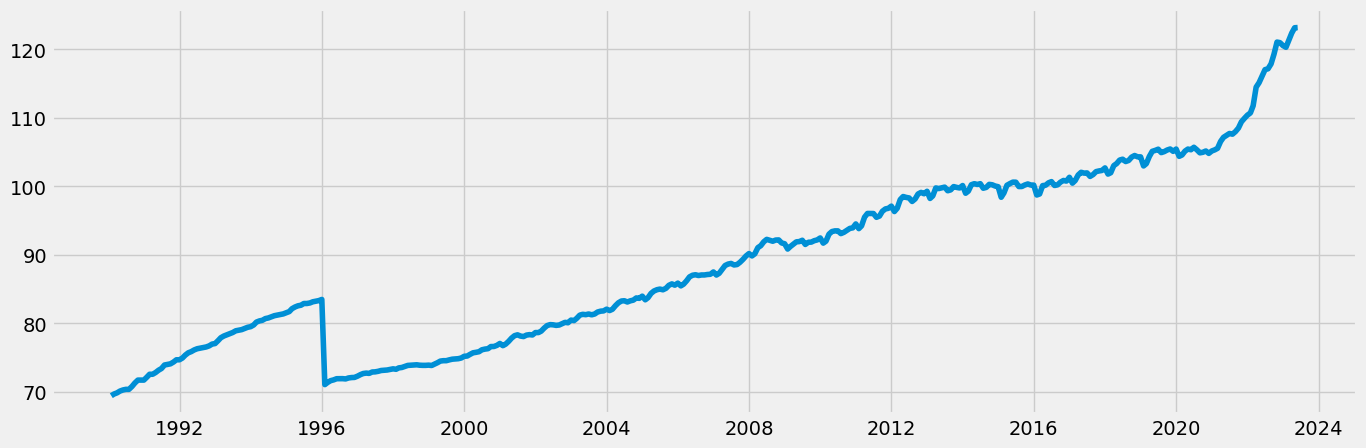

In [176]:
# Plotting data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [177]:
# Resetting index so we can use the "Date" column as a filter

data_2 = data.reset_index()

In [179]:
data_2.head()

,Date,Value
0,1990-01-31,69.46
1,1990-02-28,69.71
2,1990-03-31,69.88
3,1990-04-30,70.14
4,1990-05-31,70.30


In [180]:
data_sub = data_2.loc[(data_2['Date'] >= '2008-08-01') & (data_2['Date'] < '2020-08-01')]


In [181]:
data_sub.shape

(144, 2)

In [182]:
data_sub.head()

,Date,Value
223,2008-08-31,91.99
224,2008-09-30,92.16
225,2008-10-31,92.18
226,2008-11-30,91.74
227,2008-12-31,91.62


In [183]:
# Setting "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2008-08-31,91.99
2008-09-30,92.16
2008-10-31,92.18
2008-11-30,91.74
2008-12-31,91.62


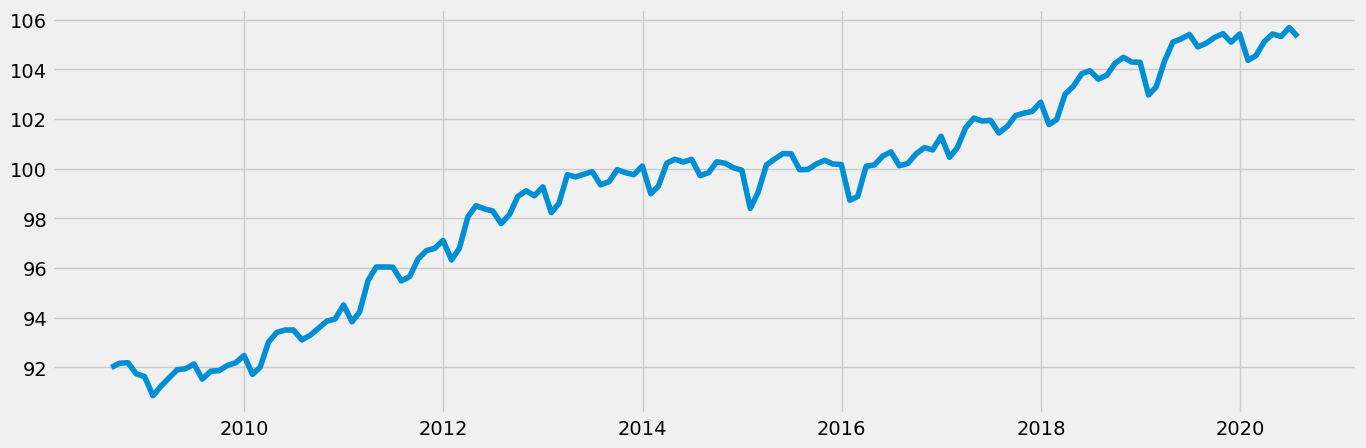

In [184]:
# Plotting new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [185]:
# Checking for missing values 

data_sub.isnull().sum() 

Value    0
dtype: int64

In [194]:
# Checking for duplicates

dups = data_sub.duplicated()
dups.sum()



13

In [197]:
data_sub.drop_duplicates(subset=None, keep="first", inplace=True)

In [199]:
dups = data_sub.duplicated()
dups.sum()


0

In [202]:
data_sub.shape

(131, 1)

In [204]:
data_sub.head()

,Value
datetime,
2008-08-31,91.99
2008-09-30,92.16
2008-10-31,92.18
2008-11-30,91.74
2008-12-31,91.62


AirBnB has started in August 2008. The data used for the project analysis was collected in late 2020.

### 3. Time-series analysis: decomposition

In [206]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [208]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 10

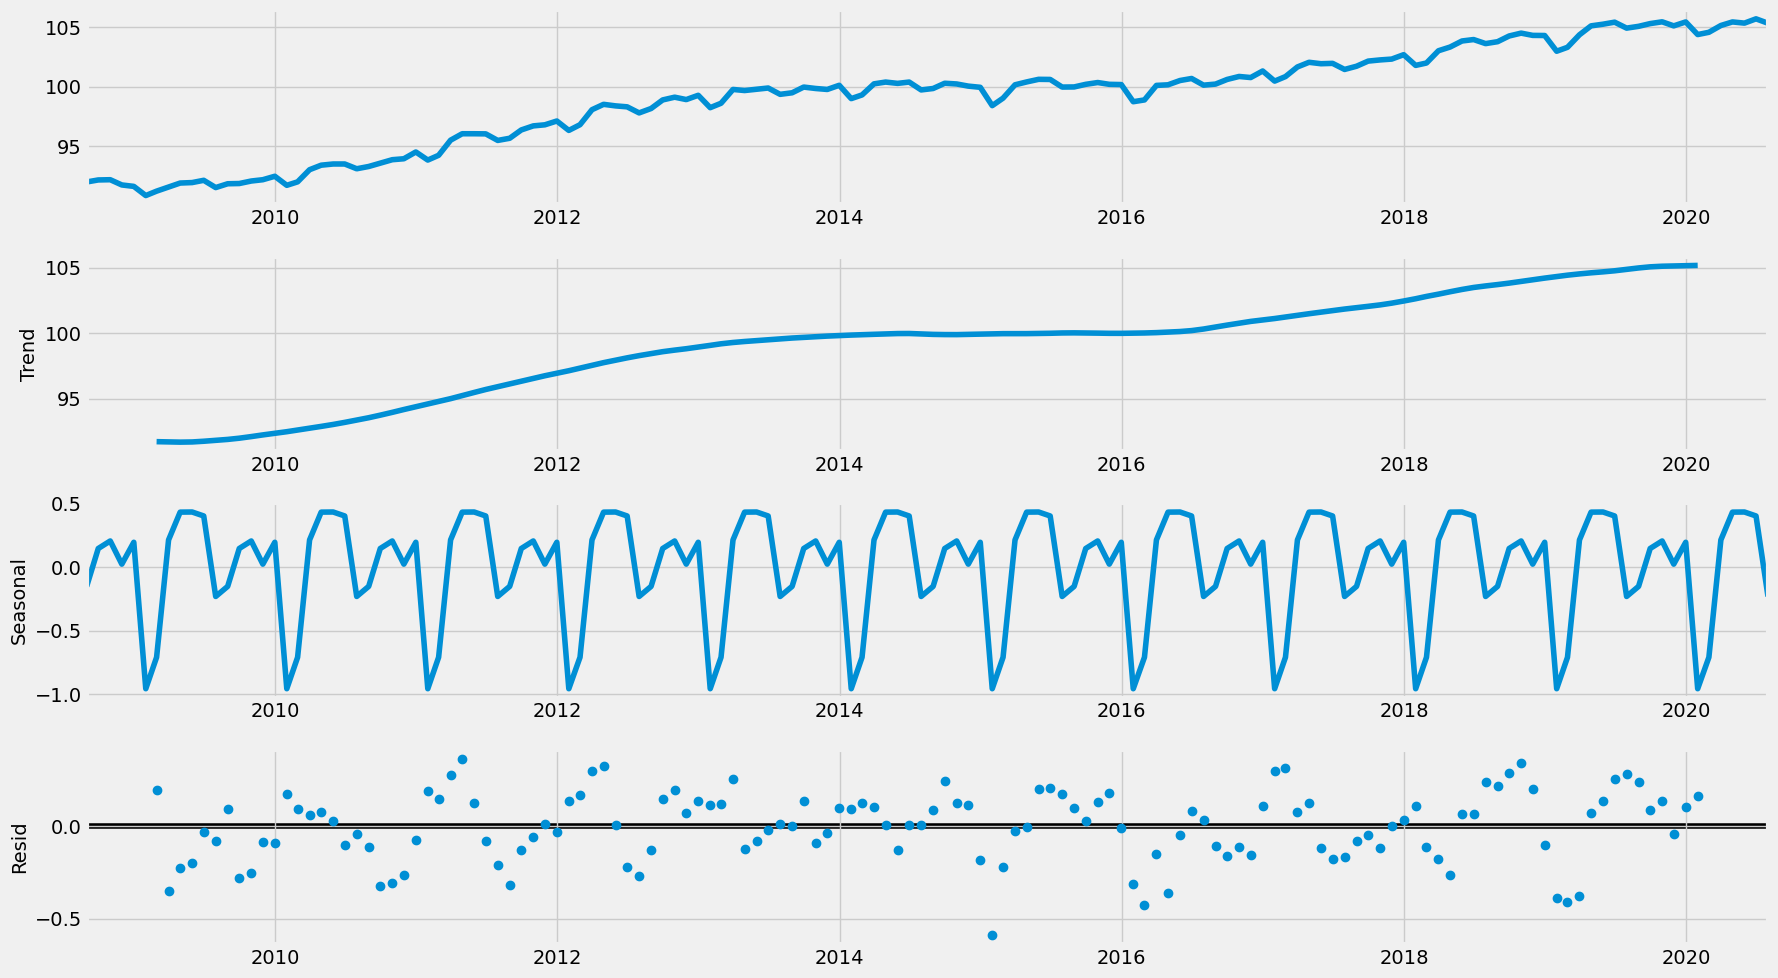

In [209]:
# Plotting separate components

decomposition.plot()
plt.show()

In [223]:
# Decomposing the time series using an multiplicative model just to compare
decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [221]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 10

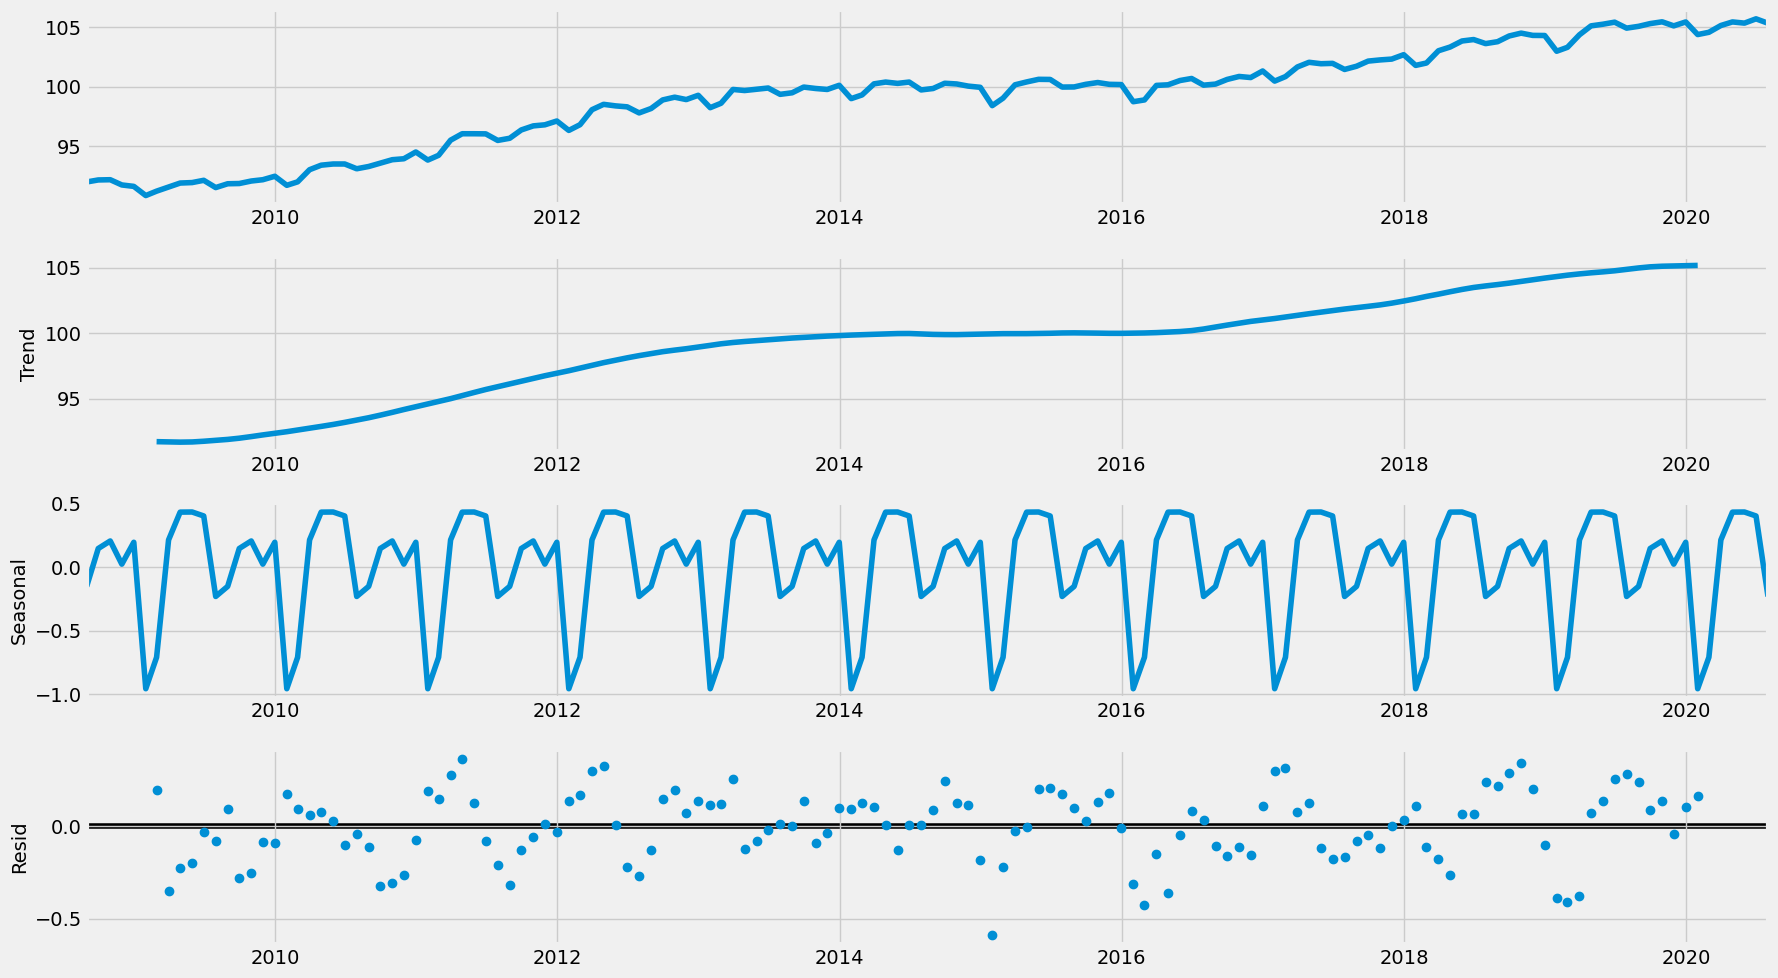

In [222]:

decomposition.plot()
plt.show()

Below the original data, the chart presents the trend, seasonality and noise. The trend in the chart above gradually raises as expected considering prices generally rising quite steadily between economical crisis'. WE see seasonal fluctuations at a regular interval. The bottom chart seems to show some noise.

Null hypothesis: There is a unit root (a random jump that can’t be explained by variation in the data) in the dataset what makes the data non-stationary.

### 4. Testing for stationarity

In [224]:
 # Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.011821
p-value                          0.748928
Number of Lags Used              4.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


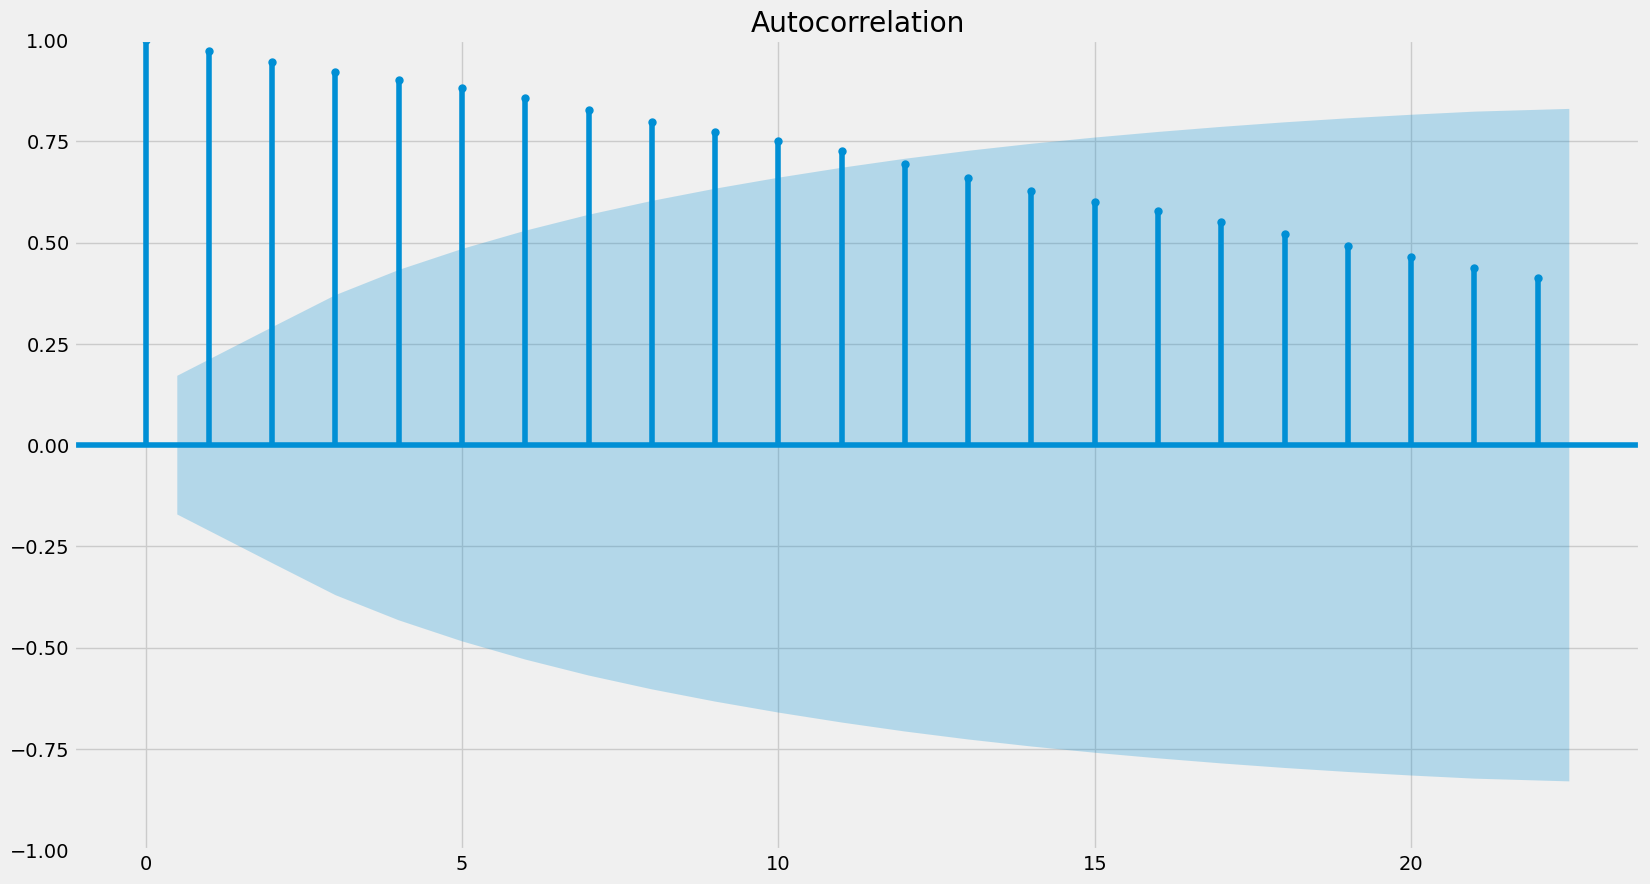

In [225]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

Test statistic larger than critical value therefore we can’t reject null hypothesis. Stationarizing is needed. 

### 5. Stationarizing the Consumer Price Index - Euro Area Data

In [226]:
data_diff = data_sub - data_sub.shift(1) 

In [227]:
# Removing the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True) 


In [228]:
data_diff.head()

,Value
datetime,
2008-09-30,0.17
2008-10-31,0.02
2008-11-30,-0.44
2008-12-31,-0.12
2009-01-31,-0.77


In [229]:
data_diff.columns

Index(['Value'], dtype='object')

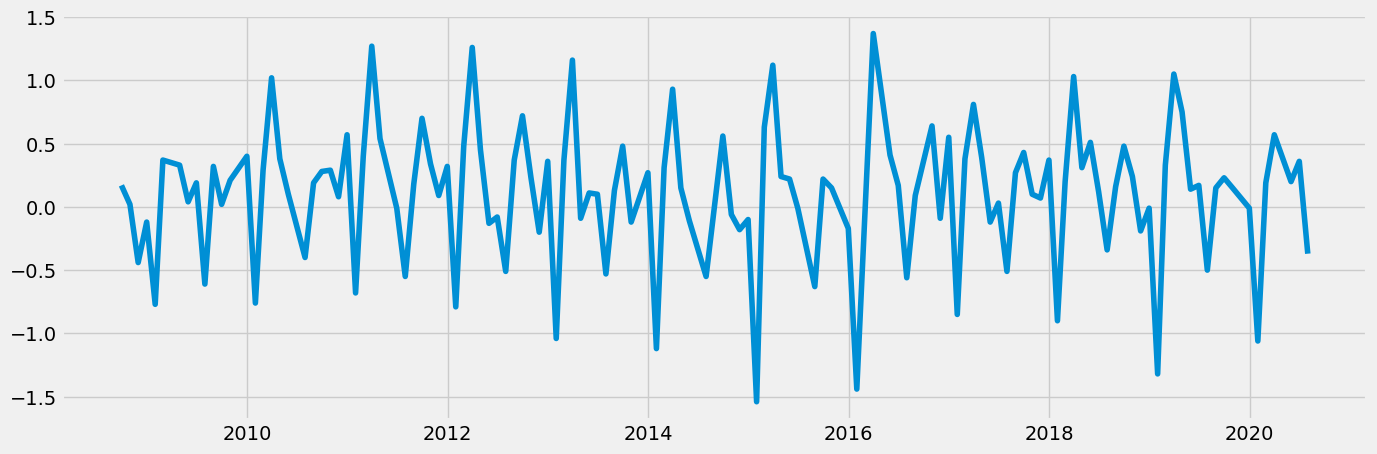

In [230]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [231]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.813718e+00
p-value                        5.568994e-17
Number of Lags Used            3.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


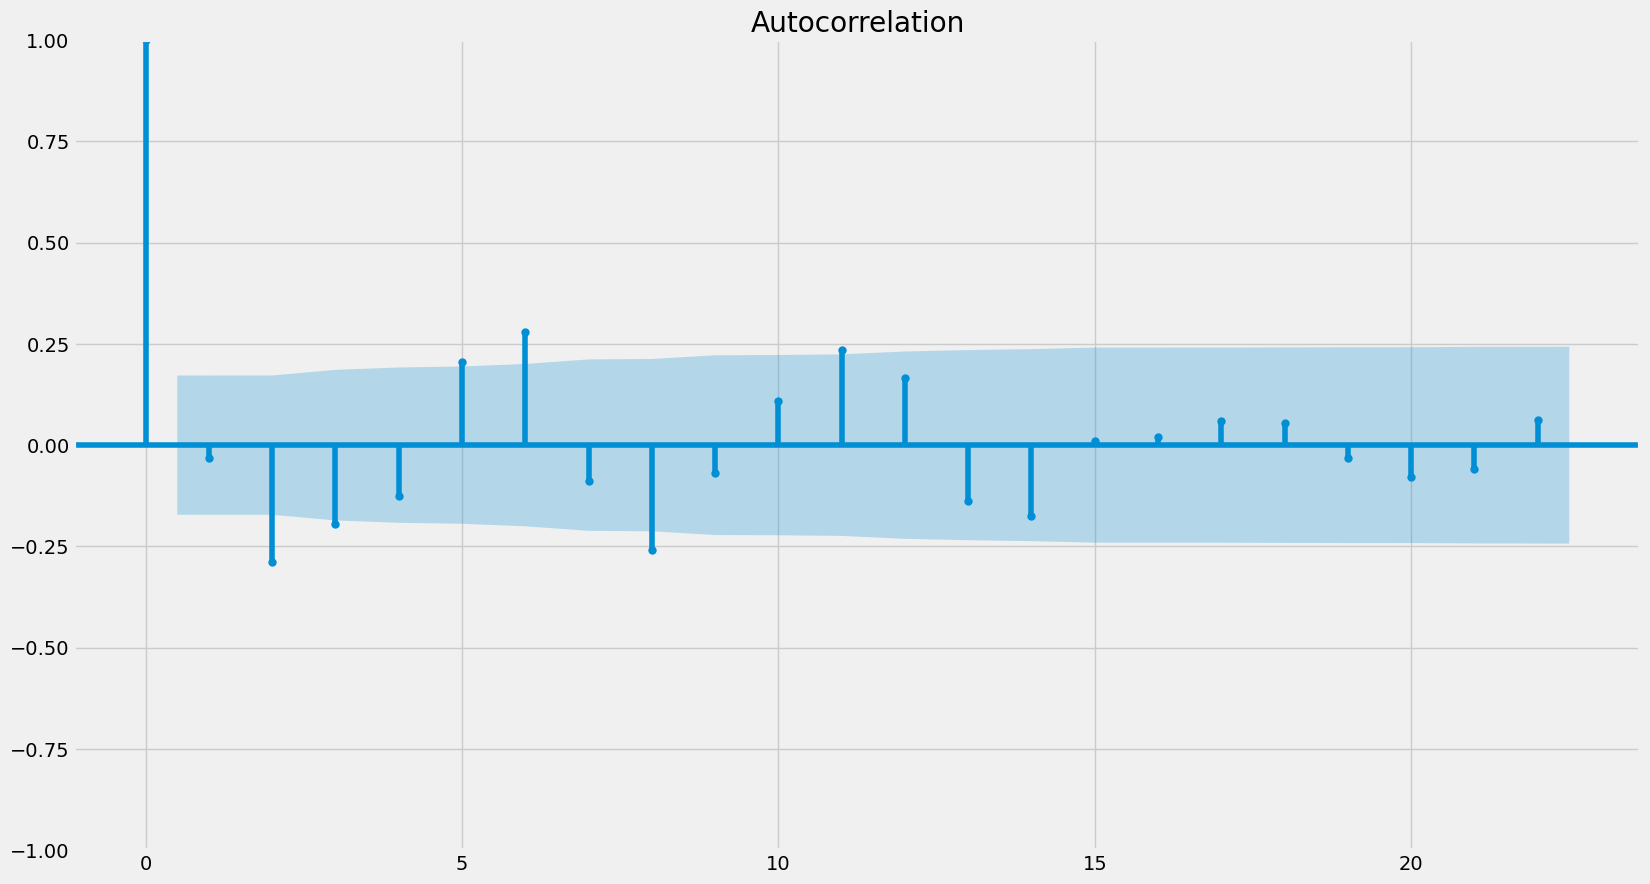

In [232]:
plot_acf(data_diff)
plt.show()

Test Statistic is now much smaller than Critical Value (5%). Since test statistic is smaller than critical value we can reject null hypothesis.